In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
import numpy as np
import pandas as pd

from disCap import disCap
from disCap import stockData

investments = stockData.investments
stock_description = stockData.stock_description

# cryptocurrencies are not available in Yahoo.  These are retrieved as a 
# one-off from messari API
specialvalues = {
     'eth': disCap.retrieve_current_cryptocoin_price('eth')
    ,'btc': disCap.retrieve_current_cryptocoin_price('btc')
    }
print(specialvalues)
investments_df = disCap.investmentsAs_df(investments, specialvalues)
stockDescription_df = disCap.stockDescriptionAs_df(stock_description)

{'eth': 1797.9957059401002, 'btc': 56815.9357263511}


In [2]:
investments_df.head(5)

,keydates,symbol,datestamp,invested,shares,close,high
0,OKTA:2020.05.20,OKTA,2020.05.20,250.0,1.33192,228.72,291.78
1,ADBE:2020.06.05,ADBE,2020.06.05,250.0,0.63630,447.59,504.17
2,ADBE:2020.06.22,ADBE,2020.06.22,80.0,0.18239,447.59,504.17
3,ADBE:2021.01.05,ADBE,2021.01.05,450.0,0.92652,447.59,504.17
4,AMZN:2020.03.10,AMZN,2020.03.10,250.0,0.13730,3081.68,3380.00


In [3]:
stockDescription_df.head(5)

,symbol,area,sector
0,AMD,US,"Tech, Semiconductors"
1,PYPL,US,"Tech, Fintech"
2,OKTA,US,"Tech, Security"
3,AMZN,US,"Virtual Marketplace, Cloud Services"
4,APPN,US,"Tech, Business Processes"


Red at gain = 0.9049165589333333.
Changes linear to yellow at 1.0.
From 1.0 to 3.6365985333333333 is green blue shift


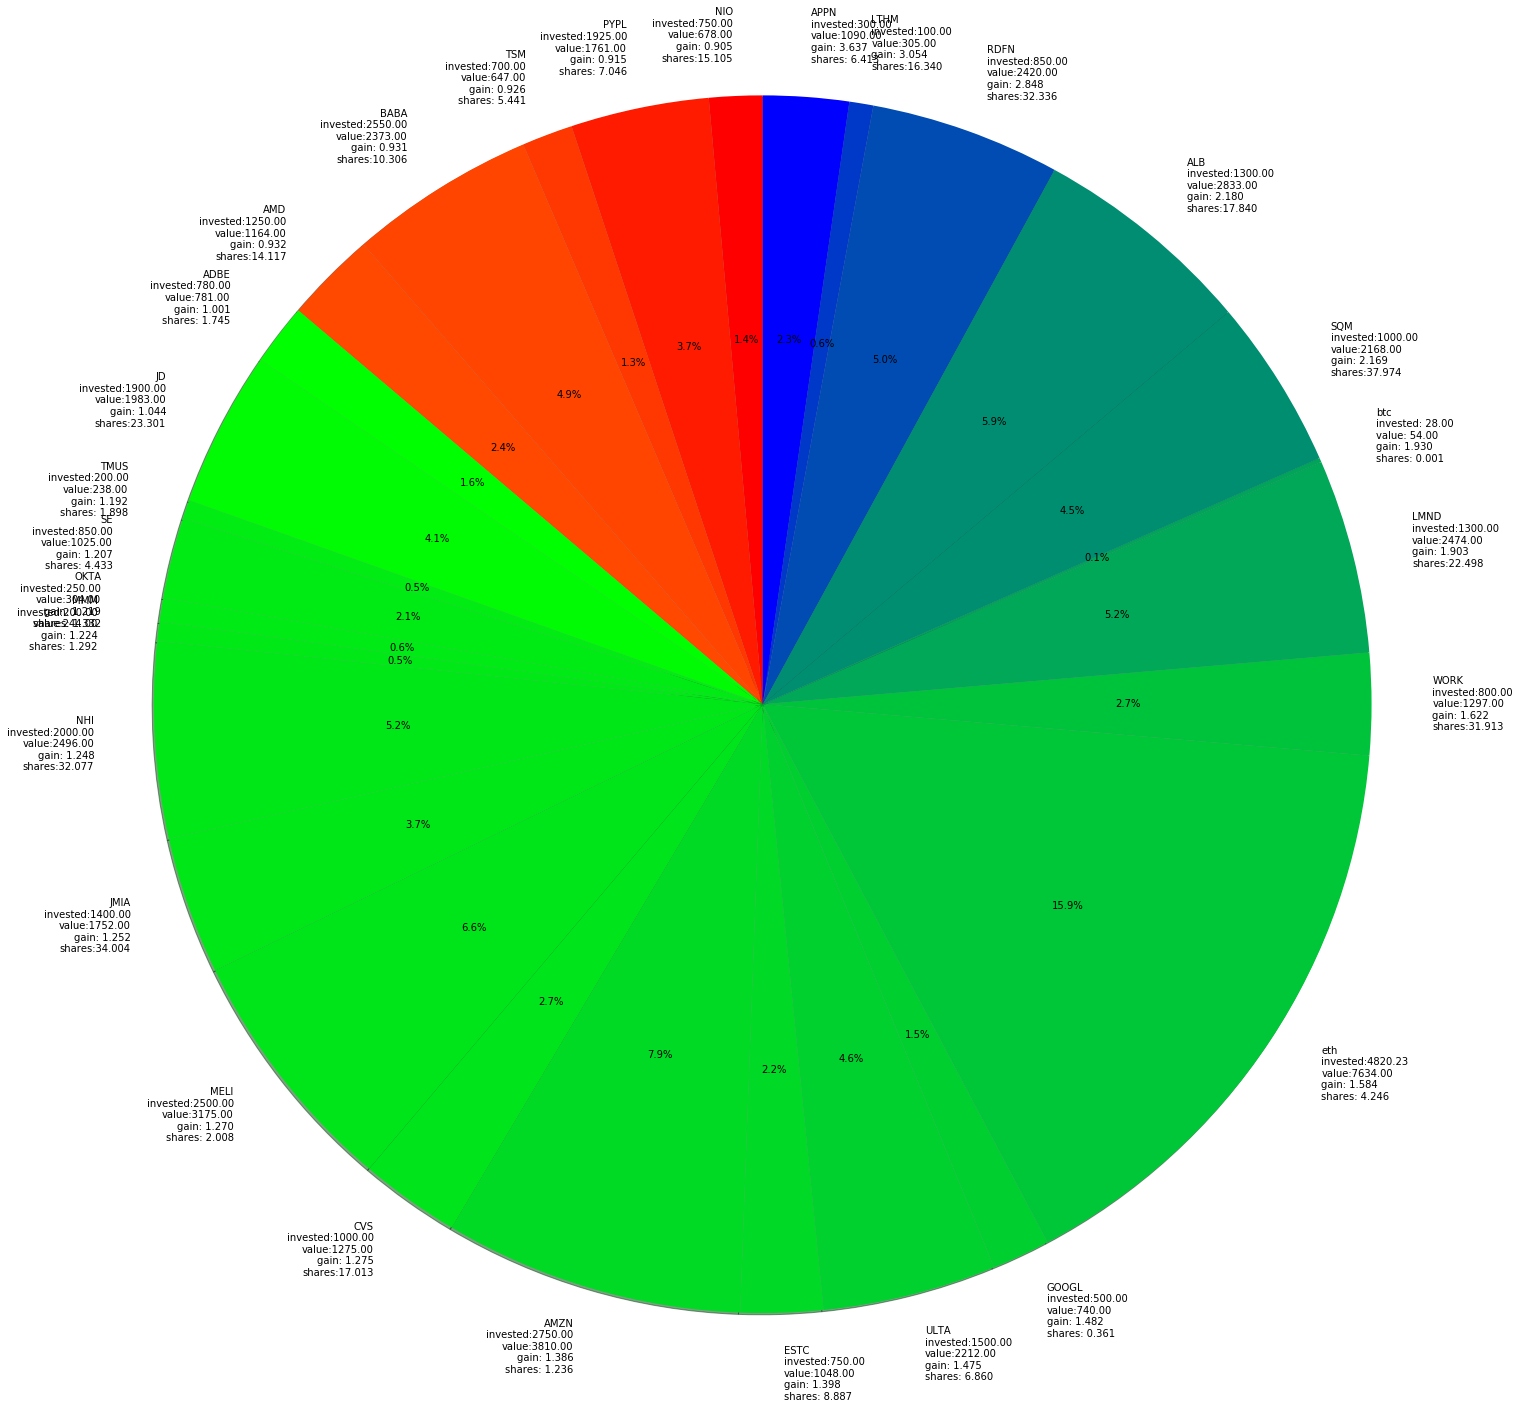



Total Invested:		34253.23
Total Value:		47994.83
Total Gain %:		  1.40


In [4]:
# make a Pie chart.
# data is sorted by gain per stock
# color from minimum to 1.0 red to yellow
# color from 1.00 to max green to blue

df, total_invested, total_value = disCap.todayValueAs_df(investments_df)

fig1, ax1 = plt.subplots()
df = df.sort_values(by=['gain'])
# rgb_gain(df.gain,0.8,0.95,2)
red_point = min( min(df.gain), 0.95)
blue_point = max( max(df.gain), 3)
green_point = 1.00

red_point = min(df.gain)
blue_point = max(df.gain)
#green_point = np.median( df.gain )

print('Red at gain = {}.\nChanges linear to yellow at {}.\nFrom {} to {} is green blue shift'.\
      format(red_point, green_point, green_point, blue_point))

label_ = list( map( disCap.mklab, df.symbol, df.invested, df.value, df.gain, df.shares) )
ax1.pie(df.value, labels=label_, autopct='%1.1f%%', shadow=True, radius=7, startangle=90, \
        colors= disCap.rgb_gain(df.gain,red_point,green_point,blue_point) )

plt.show()

print('\n\nTotal Invested:\t\t{0:6.2f}\nTotal Value:\t\t{1:6.2f}\nTotal Gain %:\t\t{2:6.2f}'.\
      format(total_invested, total_value, total_value/total_invested))

In [5]:
fields = ['symbol','gain','invested','value','shares','percentage_value','close','high','basis','panic']
df['percentage_value'] = df['percentage_value'] * 100.00
df = df.sort_values(by=['gain'])
df['panic']= df['close']/df['high']
df[fields].head(30)

,symbol,gain,invested,value,shares,percentage_value,close,high,basis,panic
16,NIO,0.904917,750.00,678.687419,15.105440,1.414085,44.930000,62.84,49.650987,0.714990
18,PYPL,0.915018,1925.00,1761.409076,7.046200,3.669998,249.980000,304.79,273.196900,0.820171
23,TSM,0.925590,700.00,647.913089,5.440990,1.349964,119.080000,140.05,128.653058,0.850268
5,BABA,0.930655,2550.00,2373.171265,10.305590,4.944640,230.280000,270.83,247.438526,0.850275
2,AMD,0.931739,1250.00,1164.673125,14.117250,2.426664,82.500000,97.25,88.544157,0.848329
0,ADBE,1.001460,780.00,781.138544,1.745210,1.627547,447.590000,504.17,446.937618,0.887776
9,JD,1.044008,1900.00,1983.615833,23.301020,4.132978,85.130000,106.88,81.541495,0.796501
22,TMUS,1.192354,200.00,238.470866,1.898200,0.496868,125.630000,135.06,105.362975,0.930179
20,SE,1.206599,850.00,1025.608876,4.433340,2.136915,231.340000,280.00,191.729035,0.826214
17,OKTA,1.218547,250.00,304.636742,1.331920,0.634728,228.720000,291.78,187.698961,0.783878


In [6]:
df[fields].to_csv('out.csv', index=False)  

In [ ]:
df = df.sort_values(by=['invested'])
df['percentage_invested'] = df['invested']/total_invested
df['gamma'] = df['percentage_value']/df['percentage_invested']
fields = ['symbol','gain','gamma','percentage_invested','invested','value','shares','percentage_value','close','basis']
df[fields].head(30)

In [ ]:
df = df.sort_values(by=['percentage_value'])
df['percentage_invested'] = df['invested']/total_invested
df['gamma'] = df['percentage_value']/df['percentage_invested']
fields = ['symbol','gain','gamma','percentage_invested','invested','value','shares','percentage_value','close','basis']
df[fields].head(30)

In [ ]:
df = df.sort_values(by=['last_investment'])
fields = ['symbol','gain','invested','value','shares','percentage_value','close',
          'basis','first_investment','last_investment']
df[fields].head(30)

In [ ]:
dfx = df.merge( stockDescription_df, on='symbol',how='left')

sector_df = dfx[['sector','invested','value']].groupby('sector').agg('sum').reset_index()
total = sum( sector_df['value'] )
sector_df['gain'] = sector_df['value']/sector_df['invested']
sector_df['percentage_value'] = 100.00*sector_df['value']/total

area_df = dfx[['area','invested','value']].groupby('area').agg('sum').reset_index()
total = sum( area_df['value'] )
area_df['gain'] = area_df['value']/area_df['invested']
area_df['percentage_value'] = 100*area_df['value']/total

In [ ]:
fig1, ax1 = plt.subplots()
df = sector_df
df = df.sort_values(by=['gain'])



label_ = list( map( disCap.mklab, df.sector, df.invested, df.value, df.gain, df.gain) )
ax1.pie(df.value, labels=label_, autopct='%1.1f%%', shadow=True, radius=7, startangle=90, \
        colors= disCap.rgb_gain(df.gain,red_point,green_point,blue_point) )

plt.show()

In [ ]:
df.head(30)

In [ ]:
fig1, ax1 = plt.subplots()
df = area_df
df = df.sort_values(by=['gain'])

red_point = min(df.gain)
blue_point = max(df.gain)
green_point = np.median( df.gain )

label_ = list( map( disCap.mklab, df.area, df.invested, df.value, df.gain, df.gain) )
ax1.pie(df.value, labels=label_, autopct='%1.1f%%', shadow=True, radius=7, startangle=90, \
        colors= disCap.rgb_gain(df.gain,red_point,green_point,blue_point) )

plt.show()

In [ ]:
df.head(30)

In [ ]:
# make time charts
showeach = 5
duration = '180d'
window = 5
symbol = 'SE'

print(symbol)
df = disCap.get_stock_data(symbol,duration)
df = disCap.add_investments(df,investments,symbol)
title_string = symbol
#doubleplot(df, showeach, title_string, window)
disCap.doubleplot_(df, showeach, title_string, window)

In [ ]:
# make time charts
showeach = 7
duration = '180d'
window = 3
symbol = 'NIO'

print(symbol)
df = disCap.get_stock_data(symbol,duration)
df = disCap.add_investments(df,investments,symbol)
title_string = symbol
#doubleplot(df, showeach, title_string, window)
disCap.doubleplot_(df, showeach, title_string, window)

In [ ]:
# make time charts
showeach = 7
duration = '180d'
window = 3
symbol = 'MELI'

print(symbol)
df = disCap.get_stock_data(symbol,duration)
df = disCap.add_investments(df,investments,symbol)
title_string = symbol
#doubleplot(df, showeach, title_string, window)
disCap.doubleplot_(df, showeach, title_string, window)

In [ ]:
# make time charts
showeach = 7
duration = '120d'
window = 3
symbol = 'TSM'

print(symbol)
df = disCap.get_stock_data(symbol,duration)
df = disCap.add_investments(df,investments,symbol)
title_string = symbol
#doubleplot(df, showeach, title_string, window)
disCap.doubleplot_(df, showeach, title_string, window)

In [ ]:
# make time charts
showeach = 5
duration = '180d'
window = 5
s = ['TSM','PYPL','AMD','MELI']

for symbol in s:
    print(symbol)
    df = disCap.get_stock_data(symbol,duration)
    df = disCap.add_investments(df,investments,symbol)
    title_string = symbol
    #doubleplot(df, showeach, title_string, window)
    disCap.doubleplot_(df, showeach, title_string, window)

In [ ]:
symbol = 'SMTC'
title_string = symbol
showeach = 5
duration = '180d'
window = 5
df = disCap.get_stock_data(symbol,duration)
disCap.standard_plot(df, showeach, title_string, window)

In [ ]:
symbol = 'POWI'
title_string = symbol
showeach = 5
duration = '180d'
window = 5
df = disCap.get_stock_data(symbol,duration)
disCap.standard_plot(df, showeach, title_string, window)

In [ ]:
symbol = 'MU'
title_string = symbol
showeach = 5
duration = '180d'
window = 5
df = disCap.get_stock_data(symbol,duration)
disCap.standard_plot(df, showeach, title_string, window)

In [ ]:
symbol = 'COHU'
title_string = symbol
showeach = 5
duration = '180d'
window = 5
df = disCap.get_stock_data(symbol,duration)
disCap.standard_plot(df, showeach, title_string, window)

In [ ]:
symbol = 'MARA'
title_string = symbol
showeach = 5
duration = '180d'
window = 5
df = disCap.get_stock_data(symbol,duration)
disCap.standard_plot(df, showeach, title_string, window)

In [ ]:
symbol = 'T'
title_string = symbol
showeach = 5
duration = '180d'
window = 5
df = disCap.get_stock_data(symbol,duration)
disCap.standard_plot(df, showeach, title_string, window)

In [ ]:
symbol = 'VZ'
title_string = symbol
showeach = 5
duration = '180d'
window = 5
df = disCap.get_stock_data(symbol,duration)
disCap.standard_plot(df, showeach, title_string, window)

In [ ]:
symbol = 'NVDA'
title_string = symbol
showeach = 5
duration = '180d'
window = 5
df = disCap.get_stock_data(symbol,duration)
disCap.standard_plot(df, showeach, title_string, window)